If a customer is spending more, they have a high spending score. 

We are interested in understanding the relation between the annual income and spending score. 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#
 df = data[['Annual Income (k$)', 'Spending Score (1-100)']]
df = data.iloc[:,[3,4]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Spending Score')

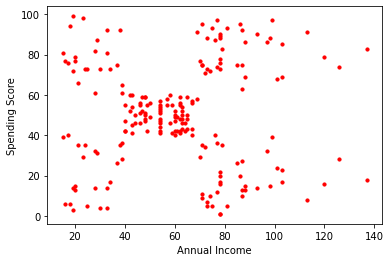

In [13]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], s=10, c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [14]:
from sklearn.cluster import KMeans 

D:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


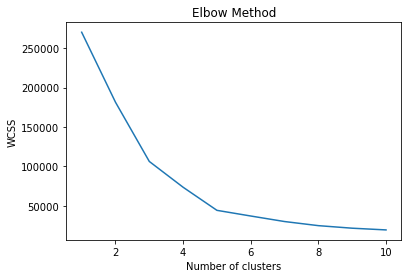

In [60]:
#within cluster sum of square
wcss = []

for i in range(1,11):
   
    #k means ++ calculates the centroid for us, 
    #n_init no of times algo with run with different vals of centroid 
    #we are doing this here for the Elbow Method 
    #k-means++ is smart centroid initialization technique, (calcs centroid itself)
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
#after looking at the diagram of elbow method, 5 seems to be the point which looks like elbow 
#so no. of clusters = 5 is selected. 
#plus we can also see that, as the no. of clusters increase, the sum of square erros decrease

kmeans = KMeans(n_clusters =5, init = 'k-means++',
               max_iter = 300, n_init = 10)

labels = kmeans.fit_predict(df)

In [68]:
#we used kmeans and did fitting in our dataframe 
#labels just show what cluster is assigned to the datas
#labels
np.unique(labels)

array([0, 1, 2, 3, 4])

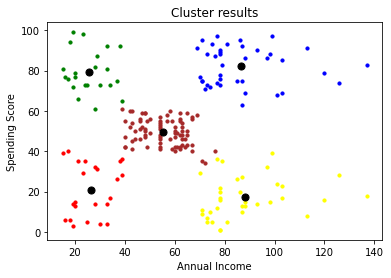

In [70]:
plt.scatter(df.iloc[labels==0,0], df.iloc[labels==0,1], s=10, c='red')
plt.scatter(df.iloc[labels==1,0], df.iloc[labels==1,1], s=10, c='blue')
plt.scatter(df.iloc[labels==2,0], df.iloc[labels==2,1], s=10, c='green')
plt.scatter(df.iloc[labels==3,0], df.iloc[labels==3,1], s=10, c='yellow')
plt.scatter(df.iloc[labels==4,0], df.iloc[labels==4,1], s=10, c='brown')

plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 50, c= 'black')
plt.title('Cluster results')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()